In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as matlib
from skimage import io
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
import cv2 as cv

(1156, 521, 3)


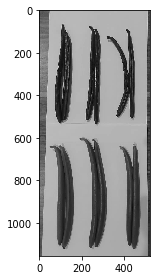

In [2]:
path=r'/home/arivle/Documents/ugm/kuliah/semester 3/pengenalan-pola/4-segmentasi-vanili/Vanili.jpeg'
image = io.imread(path)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
io.imshow(gray)
print(image.shape)
io.show()

[101 102 105 ...  37  37  36]


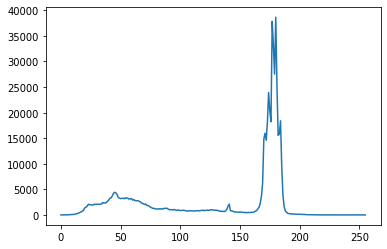

In [3]:
def get_histogram(image, bins):
  histogram = np.zeros(bins)
  for pixel in image:
    histogram[pixel] += 1
  return histogram

grArray = np.asarray(gray)
flat = grArray.flatten()
print(flat)
hist = get_histogram(flat, 256)
plt.plot(hist)

In [4]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

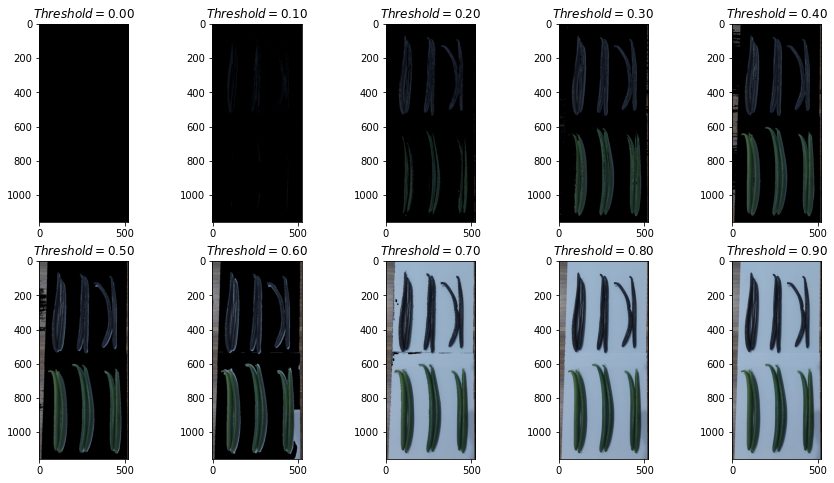

In [5]:
th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))

img_gray = rgb2gray(image)
for th, ax in zip(th_values, axis.flatten()):
    
    img_binarized = img_gray < th
    hasil = masked_image(image, img_binarized)
    ax.imshow(hasil)
    ax.set_title('$Threshold = %.2f$' % th)

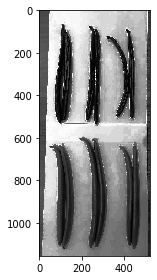

In [6]:
equ = cv.equalizeHist(gray)
io.imshow(equ)

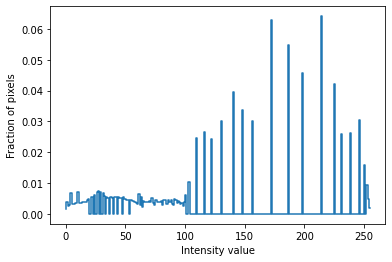

In [7]:
freq2, bins2 = histogram(equ)
plt.step(bins2, freq2*1.0/freq2.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');

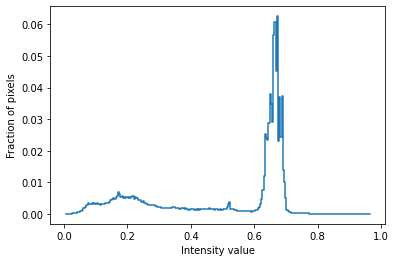

In [8]:
freq, bins = histogram(img_gray)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');

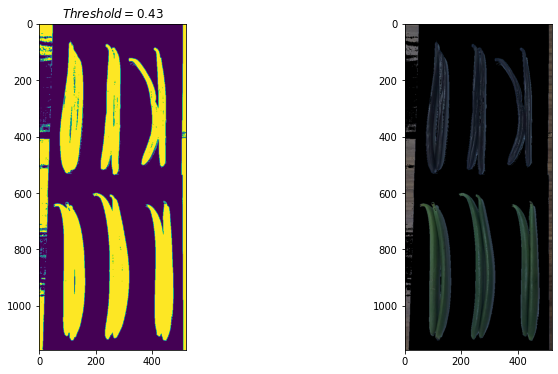

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh
ax[0].set_title('$Threshold = %.2f$' % thresh)
ax[0].imshow(img_otsu)
filtered = masked_image(image, img_otsu)
ax[1].imshow(filtered)